In [4]:
import swarms
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from swarms import MMOON, MEARTH, MJUP, AU, RJUP, PC, LSUN, MSUN, JY, YEAR, MICRON

try:
    plt.style.use('paper')
except:
    pass

In [3]:
star = swarms.Star(L=20*LSUN, M=2.1*MSUN, T=8410, d=10*PC)
planet = swarms.Planet(star, M=MJUP, R=RJUP, a=50*AU, Q=0.5)
    
# Swarm
RHO=1500
M0 = 10 * MMOON; Dt = 100.; Dmax = 250000.;
M_pl = 318 * MEARTH; a_pl = 50 * AU; R_pl = RJUP
eta = 0.4; Nstr = 6.; Q = 0.1
swarm = swarms.CollSwarm(star, planet, M0, Dt, Dmax, eta, Nstr, Q, correction=True, alpha=1./1.2)

C:\Users\loloynage\Documents\CE-Irregular-Satellites\jupyter_examples\swarms.py:206: RuntimeWarning: overflow encountered in exp
  b = 1/(exp(H*(C/lamb)/(K_B*T)) - 1)


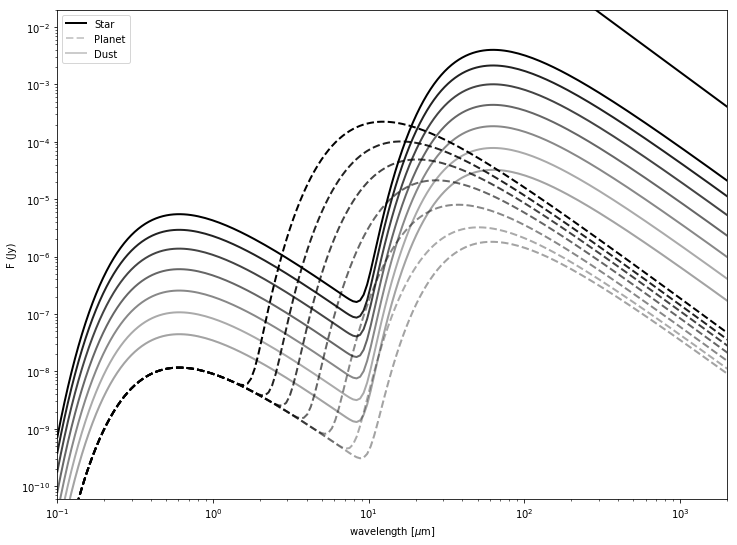

In [11]:
lambdas = np.logspace(-7, -2.5, 200)
times = np.logspace(7.7, 10, 7) * YEAR
alphas = np.linspace(1, 0.2, 7)
g = 0.32 # assume phase function for Lambert sphere at maximum extension from host star

Fstar = star.computeFthermal(lambdas, star.d)

fig, ax = plt.subplots(figsize=(12,9))
ax.loglog(lambdas/MICRON, Fstar/JY, 'k', lw=2, label="Star")

for time, alpha in zip(times, alphas):
    planet.age = time
    swarm.updateSwarm(time)
    Fplanet = planet.computeFthermal(lambdas) + planet.computeFscat(lambdas, g)
    FISD = swarm.computeFthermal(lambdas) + swarm.computeFscat(lambdas, g)

    ax.loglog(lambdas/MICRON, Fplanet/JY, 'k--', lw=2, alpha=alpha)
    ax.loglog(lambdas/MICRON, FISD/JY, 'k', lw=2, alpha=alpha)
 
# overplot last lines with labels
ax.loglog(lambdas/MICRON, Fplanet/JY, 'k--', lw=2, label="Planet", alpha=alpha)
ax.loglog(lambdas/MICRON, FISD/JY, 'k', lw=2, label="Dust", alpha=alpha)

ax.set_xlabel(r"wavelength [$\mu$m]")
ax.set_ylabel("F (Jy)")
ax.set_ylim([6e-11, 2.e-2])
ax.set_xlim([0.1, 2000])
ax.legend()